In [6]:
#importing some useful packages
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import numpy as np
import cv2
%matplotlib inline

In [ ]:
import math

def grayscale(img):    
    return cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)    
def canny(img, low_threshold, high_threshold):    
    return cv2.Canny(img, low_threshold, high_threshold)

def gaussian_blur(img, kernel_size):    
    return cv2.GaussianBlur(img, (kernel_size, kernel_size), 0)

def region_of_interest(img, vertices):    
    
    mask = np.zeros_like(img)    
    
    if len(img.shape) > 2:
        channel_count = img.shape[2] 
        ignore_mask_color = (255,) * channel_count
    else:
        ignore_mask_color = 255        
    
    cv2.fillPoly(mask, vertices, ignore_mask_color)
    
    
    masked_image = cv2.bitwise_and(img, mask)
    return masked_image


def draw_lines(img, lines, color=[255, 0, 0], thickness=2):   
    
    leftline=[]
    rightline=[]
    
    leftcount=0
    rightcount=0
    
    
    for line in lines:
        for x1,y1,x2,y2 in line:                                  
            #print('line is',line)
            cv2.line(img, (x1, y1), (x2, y2), color, thickness)
            if x1!=x2:                
                m=(y2-y1)/(x2-x1)                
                if m<-0.5:
                    leftline.extend(line)
                    leftcount=leftcount+1
                elif m>0.5:
                    rightline.extend(line)         
                    rightcount=rightcount+1
                
    
    
    #print('leftcount=',leftcount)
    #print('rightcount=',rightcount)
    lmean=np.mean(leftline, axis=0)
    
    rmean=np.mean(rightline, axis=0)
    #print()
    
    means=[lmean,rmean]
      
    
    return means
            

def hough_lines(image_fordetecting_lines,color_image, rho, theta, threshold, min_line_len, max_line_gap):
        
    lines = cv2.HoughLinesP(image_fordetecting_lines, rho, theta, threshold, np.array([]), minLineLength=min_line_len, maxLineGap=max_line_gap)    
    line_img = np.zeros((*image_fordetecting_lines.shape, 3), dtype=np.uint8)
    #draw_lines(line_img, lines)
    temp_img=np.copy(color_image)  
    
    mean=draw_lines(temp_img, lines)
    
    #print('type(mean)',type(mean))
    #print('mean',mean)
    #mean=np.around(mean)    
    mean=np.int32(mean)       
    
    igno=draw_lines(color_image, [mean])
    
    
    lx1=mean.item(0,0)
    ly1=mean.item(0,1)

    lx2=mean.item(0,2)
    ly2=mean.item(0,3)


    rx1=mean.item(1,0)
    ry1=mean.item(1,1)

    rx2=mean.item(1,2)
    ry2=mean.item(1,3)
    
    m1=(ly2-ly1)/(lx2-lx1)
    m2=(ry2-ry1)/(rx2-rx1)

    x1=lx1+ ((540-ly1)/(m1))
    x2=lx1+ ((320-ly1)/(m1))

    x3=rx1+ ((320-ry1)/(m2))
    x4=rx1+ ((540-ry1)/(m2))
    
    pointsfound=[[[x1 ,540,x2,320],[x3,320,x4,540]]]
    pointsfound=np.around(pointsfound)
    pointsfound=np.int32(pointsfound)
    draw_lines(color_image,pointsfound,color=[255, 0, 0], thickness=5)
 
    
    
    return color_image



def weighted_img(img, initial_img, α=0.8, β=1., λ=0.):

    return cv2.addWeighted(initial_img, α, img, β, λ)   





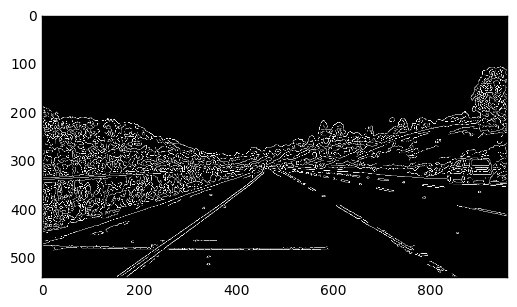

In [16]:
import os
images=os.listdir("test_images/")

image = mpimg.imread('test_images/'+images[4])


colorimage=image

i=0
#converting to gray scale
gray_img=grayscale(image)

#gaussian blurring the gray image
blur_img=gaussian_blur(gray_img,3) 


#canny edge detection on blurred image
canny_img=canny(blur_img,10,30)

i=i+1
plt.figure(i)
plt.imshow(canny_img,cmap='gray')
#Hough transform on masked region 

hough_image=hough_lines(masked_img,colorimage, 1, np.pi/180, 10, 5, 200)
#hough_lines(image_fordetecting_lines,color_image, rho, theta, threshold, min_line_len, max_line_gap):

i=i+1
plt.figure(i)
plt.imshow(hough_image)
